In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
%matplotlib inline

In [2]:
# Загрузка исходных данных
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig')
orders    = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg')
items     = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw')

### Описание данных таблицы customers
- customer_id — позаказный идентификатор пользователя (аналог номера паспорта)
- customer_unique_id —  уникальный идентификатор пользователя
- customer_zip_code_prefix —  почтовый индекс пользователя
- customer_city —  город доставки пользователя
- customer_state —  штат доставки пользователя

In [3]:
# Описание струкутры данных таблицы с с уникальными идентификаторами пользователей
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Стоит отметить, что никаких явных проблем с данными нет, пропущенные значения отсутствуют, типы данных не требуют изменений

### Описание данных таблицы orders
- order_id —  уникальный идентификатор заказа (номер чека)
- customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)
- order_status —  статус заказа
- order_purchase_timestamp —  время создания заказа
- order_approved_at —  время подтверждения оплаты заказа
- order_delivered_carrier_date —  время передачи заказа в логистическую службу
- order_delivered_customer_date —  время доставки заказа
- order_estimated_delivery_date —  обещанная дата доставки

In [4]:
# Описание струкутры данных таблицы заказов
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- В данной таблице заметны пропущенные значения в колонках с датами, которые могут быть связаны с особенностями работы магазина и формирования цепочки исполнения заказа.
- Явно заметна проблема с типами данных, большинство колонок хранят в себе данные о времени, но представлены в строковом типе данных.

In [5]:
# Перевод необходимых колонок к временному типу данных
orders['order_purchase_timestamp']      = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at']             = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date']  = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [6]:
# Самопроверка
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Описание данных таблицы items
- order_id —  уникальный идентификатор заказа (номер чека)
- order_item_id —  идентификатор товара внутри одного заказа
- product_id —  ид товара (аналог штрихкода)
- seller_id — ид производителя товара
- shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
- price —  цена за единицу товара
- freight_value —  вес товара

In [7]:
# Описание струкутры данных таблицы товарных позиций, входящих в заказы
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Стоит отметить, что никаких явных проблем с данными нет, пропущенные значения отсутствуют, только одна колонка требует изменение типа данных - shipping_limit_date, так как она отражает собой дату.

In [8]:
# Перевод необходимой колонки к временному типу данных
items['shipping_limit_date'] = pd.to_datetime(items.shipping_limit_date)

In [9]:
# Самопроверка
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# Задача 1
Сколько у нас пользователей, которые совершили покупку только один раз?

Для анализа покупок пользователей нам необходимо связать таблицы **customers** и **orders**, чтобы иметь доступ к **уникального id клиента**. Для реализации данной цели воспользуемся методом **merge**.

In [10]:
# left join датафреймов с помощью метода merge
customers_orders_df = orders.merge(customers, how='left', on='customer_id')

### Анализ проблемы
Для решения поставленной задачи сперва необходимо понять, что можно считать за "покупку". Интерпретировать данную категорию в нашем случае можно несколькими способами:
1. Мы считаем за покупку все заказы, которые имеют любой статус (**order_status**), кроме **"unavailable"** и **"canceled"**. 
    - **Unavailable** можно интерпретировать как "пропавший заказ" или заказ, с которым произошла ошибка в цепочке исполнения заказа. 
    - **Canceled** говорит нам о том, что заказ был отменен. Как правило, заказ возможно отменить на любой стадии его исполнения, также, если отменить его после оплаты, то магазин вернет деньги клиенту, что позволяет нам не считать отмененные заказы за покупку.


2. Мы считаем за покупку все заказы, которые имеют любой статус (**order_status**), кроме **"created"**, **"unavailable"** и **"canceled"**. Логика исключения **created** состоит в том, что заказы с таким статусом не оплачены, соответственно нет смысла считать их за покупку.


3. Мы считаем за покупку все заказы, которые имеют время подтверждения оплаты заказа (**order_approved_at**). Логика проста: если нам поступили деньги за заказ, то покупка совершена.

Проверим целесообразность вышеописанных методов, проведя исследовательский анализ данных с точки зрения статусов заказа (**order_status**).

In [11]:
# Общее количество пропущенных значений
customers_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [12]:
# Расмотрим заказы со статусом unavailable
customers_orders_df.query("order_status == 'unavailable'").isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

**Выводы**: все заказы оплачены, но ни один не поступил в логистическую службу, следовательно данные заказы мы можем считать за покупку.

In [13]:
# Расмотрим заказы со статусом canceled
customers_orders_df.query("order_status == 'canceled'").isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

**Выводы**: мысль о том, что заказ возможно отменить на любой стадии его исполнения подтвердилась. Из информации о данных видно, что присутствуют заказы, которые были отменены до оплаты, после оплаты и даже после того, как покупатель получил заказ (то есть клиент оформил возврат). Так как отмена или возврат заказа на любом этапе предполагает возврат денег клиенту (если заказ был оплачен), то заказы со статусом **canceled** мы можем не считать за покупку.

In [14]:
# Расмотрим заказы со статусом created
customers_orders_df[['order_status', 'order_approved_at']].query("order_status == 'created'").isna().sum()

order_status         0
order_approved_at    5
dtype: int64

**Вывод**: все заказы со статусом **created** не оплачены, что позволяет нам не считать из за покупку.

In [15]:
# Расмотрим заказы со статусом delivered
customers_orders_df.query("order_status == 'delivered'").isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

**Вывод**: так как 14 заказов не имеют время подтверждения оплаты заказа (**order_approved_at**), 2 не имеют времени передачи заказа в логистическую службу (**order_delivered_carrier_date**), 8 не имеют подтвержденного времени доставки заказа (**order_delivered_customer_date**), разумно предположить, что статус **delivered** некоторым заказам был присвоен ошибочно.

### Локальное заключение
Проведя исследовательский анализ данных можно утверждать, что за "покупку" разумно считать заказы с любым статусом заказа (**order_status**), кроме **created** и **canceled**, а так же заказы, которые имеют время подтверждения оплаты заказа (**order_approved_at**).

### Замечание:
Так как пропущенные значения имеют колонки с датами, то заполним пропуски нулями, для упрощения фильтрации данных.

In [16]:
# Заполнение пропусков
customers_orders_df = customers_orders_df.fillna(0)

In [17]:
# Посчитаем количество покупок, которое совершил каждый пользователь
purchase_df = customers_orders_df \
    .query("order_status != 'created' & \
            order_status != 'canceled' & \
            order_approved_at != 0") \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'purchases'})

In [18]:
purchase_df.purchases.value_counts()

1     92621
2      2686
3       187
4        30
5         8
6         6
7         3
17        1
9         1
Name: purchases, dtype: int64

### Итог:
У нас **92621** пользователей, которые совершили покупку только один раз.

# Задача 2
Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Для анализа покупок пользователей нам необходимо связать таблицы **customers** и **orders**, чтобы иметь доступ к уникального id клиента. Для реализации данной цели воспользуемся методом **merge**.

In [19]:
# left join датафреймов с помощью метода merge
customers_orders_df_task_2 = orders.merge(customers, how='left', on='customer_id')

In [20]:
customers_orders_df_task_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [21]:
customers_orders_df_task_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

### Замечание:
Так как пропущенные значения имеют колонки с датами, то заполним пропуски нулями, для упрощения фильтрации данных.

In [22]:
# Заполнение пропусков
customers_orders_df_task_2 = customers_orders_df_task_2.fillna(0)

### Порядок решения задачи:
Для выполнения поставленной задачи необходимо перегруппировать данные: 
- Следует отфильтровать данные по статусу заказа, так как нас интересуют все статусы, кроме **delivered**;
- При выполнении предыдущего задания мы выяснили, что статус **canceled** включает в себя как отмененные заказы, так и возвращенные, что позволяет нам отфильтровать данные также по колонке времени доставки заказа (**order_delivered_customer_date**). Нам интересны заказы, которые никогда не были доставлены;
- Сгруппировать данные по времени создания заказа (**order_purchase_timestamp**) и по статусу заказа (**order_status**);
- Провести аггрегацию по полю уникальный идентификатор заказа (**order_id**) и посчитать количество недоставленных заказов по кажому статусу за каждый месяц;
- Имея готовое количество заказов по каждому месяцу и статусу, провести еще одну группировку по статусу заказа (**order_status**);
- Провести аггрегацию по полю количество заказов (**count_orders**) и посчитать среднее (в месяц) количество недоставленных заказов по кажому статусу.

In [23]:
# Проверим факт того, что все айди заказов уникальные и не повторяются
customers_orders_df_task_2.order_id.value_counts().sort_values(ascending=False).head()

210e60465099814a1d2c7635e4065153    1
ef99f25a4dd935f92a388af905f868d1    1
61d6fb5d839877cf9795ee80fd081935    1
2cb5ebc8618b31204c46aab763a8ca88    1
b2bd1f09c1b8a4a36940f6f6e49d5dec    1
Name: order_id, dtype: int64

In [24]:
# Предварительно, для удобства, сократим интересующую нас дату к формату "год-месяц"
customers_orders_df_task_2['order_purchase_timestamp'] = customers_orders_df_task_2.order_purchase_timestamp.dt.strftime("%Y-%m")

Организуем сводную таблицу недоставленных заказов (по статусам) с разбивкой по месяцам.

In [25]:
non_delivered_pivot = customers_orders_df_task_2 \
    .query("order_delivered_customer_date == 0 &\
            order_status != 'delivered'") \
    .groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_purchase_timestamp': 'order_date',
                     'order_id': 'count_orders'}) \
    .pivot(index='order_date', columns='order_status', values='count_orders') \
    .fillna(0)

### Детализация
Так как данная задача требует детализации полученных данных, то возникает разумный вопрос: каким способом рациональнее всего представить отчет? Напрашивается 2 опции:

1. Так как простая сводная таблица может быть некомфортна для восприятия, можно построить тепловую карту на ее основе, которая будет отражать в какие месяцы и на каком статусе возникли проблемы с доставкой.


2. Сама задача требует детализации по среднемесячным значениям по каждому статусу, соответственно можно провести дополнительное преобразование данных для того, чтобы получить интересующую информацию.

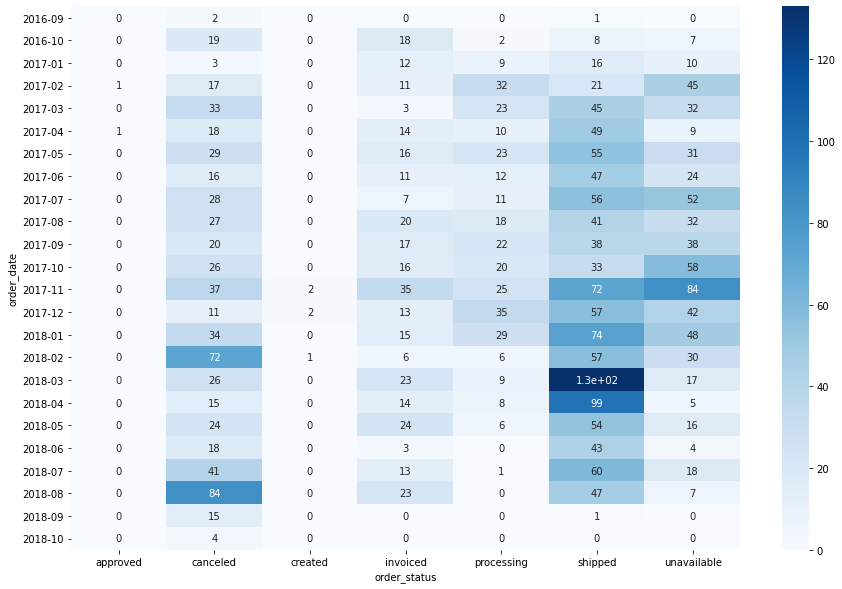

In [26]:
# Оборачивание сводной таблицы в тепловую карту, которая позволяет более наглядно выявлять проблемные периоды и статусы

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(non_delivered_pivot, annot=True, cmap="Blues")

In [27]:
# Исходное требование задачи
# Данным преобразованием мы узнаем сколько заказов в месяц в среднем не доставляется по разным причинам
detalization = non_delivered_pivot.agg('mean').sort_values(ascending=False)

In [28]:
detalization

order_status
shipped        46.125000
canceled       25.791667
unavailable    25.375000
invoiced       13.083333
processing     12.541667
created         0.208333
approved        0.083333
dtype: float64

# Задача 3
По каждому товару определить, в какой день недели товар чаще всего покупается.

Для работы над данной задачей необходимо объеденить таблицы **items** и **orders**.

In [29]:
# left join датафреймов с помощью метода merge
orders_items_df = orders.merge(items, how='left', on='order_id')

In [30]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

### Дни недели
В данном задании нам необходимо группировать данные по дням недели, чтобы узнать в какой из них было совершено максимальное количество покупок товара. Разумно ввести дополнительную колонку, которая будет хранить себе название дня недели определенной даты. Так как мы хотим узнать в какой день товар чаще всего покупается, то воспользуемся способом фильтрации данных из первого задания и день недели будем определять по времени подтверждения оплаты заказа (**order_approved_at**). 

In [31]:
# Создаем колонку, которая хранит в себе название дня из времени подтверждения оплаты заказа
orders_items_df['approved_day'] = orders_items_df.order_approved_at.dt.day_name()

Так как пропущенные значения имеют колонки с датами, то заполним пропуски нулями, для упрощения фильтрации данных.

In [32]:
# Заполнение пропусков
orders_items_df = orders_items_df.fillna(0)

### Порядок решения задачи:
1. Как и в первом задании, за "покупку" будем считать заказы с любым статусом заказа (**order_status**), кроме **created** и **canceled**, а так же заказы, которые имеют время подтверждения оплаты заказа (**order_approved_at**).


2. Сгруппируем данные по id товара (**product_id**) и по дням недели (**approved_day**), которые мы получили выше.


3. Посчитаем количество покупок.


4. Обернем полученный результат в сводную таблицу, строками которой будут id товаров (**product_id**), колонками - дни недели (**approved_day**), а значениями выступят посчитанные значения количества покупок для каждого товара (**purchases**).

In [33]:
# Расчет сводной таблицы по описанному выше алгоритму
day_pivot = orders_items_df \
    .query("order_status != 'created' & \
            order_status != 'canceled' & \
            order_approved_at != 0 & \
            product_id != 0") \
    .groupby(['product_id', 'approved_day'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'purchases'}) \
    .pivot(index='product_id', columns='approved_day', values='purchases') \
    .fillna(0)

### Детализация
Так как нам требуется узнать день недели, в который товар чаще всего покупается, то разумно сконцентрировать внимание читателя на конкретном значении в таблице. Для этого можно использовать 2 опции:

1. Создать дополнительную колонку, которая будет хранить в себе название дня недели, в который было совершено максимальное количество покупок товара.


2. Так как максимальных значений может быть несколько у одного продукта (например, его купили по 2 раза во вт, ср и чт), то разумно выделить максимальные значения цветом.

Реализация второй опции представлена ниже. Получившаяся таблица хранит в себе 30+K строк, оставлять ее полностью в ноутбуке не лучшая затея, так как она сильно замедляет скорость работы. Для проверки исполнения просто запустите датасет и немного подождите :)

In [34]:
day_pivot = day_pivot.style.highlight_max(axis=1)

In [ ]:
day_pivot

# Задача 4
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Для решения данной задачи необходимо использовать данные из таблицы **orders** и **customers**, чтобы иметь доступ к уникальному id пользователя (**customer_unique_id**).

In [35]:
# left join датафреймов с помощью метода merge
customers_purchases_df = orders.merge(customers, how='left', on='customer_id')

In [36]:
# Для упрощения группировки сократим интересующую нас дату покупки к формату "год-месяц", записав ее в новую колонку
customers_purchases_df['approved_month'] = customers_purchases_df.order_approved_at.dt.strftime("%Y-%m")

In [37]:
customers_purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

### Порядок решения задачи:
1. Так как пропущенные значения присутствуют только в колонках с датами, заполним их нулями, для упрощения фильтрации данных.


2. Отфильтруем из исходной таблицы только покупки. Согласно методологии из первого задания за "покупку" будем считать заказы с любым статусом заказа (**order_status**), кроме created и canceled, а так же заказы, которые имеют время подтверждения оплаты заказа (**approved_month**).


3. Сгруппируем данные по месяцу покупки (**approved_month**) и уникальному id пользователя (**customer_unique_id**).


4. Посчитаем количество покупок у каждого пользователя в каждый месяц, проведя аггрегацию.

In [38]:
buying_by_month = customers_purchases_df \
    .fillna(0) \
    .query("order_status != 'created' & \
            order_status != 'canceled' & \
            approved_month != 0") \
    .groupby(['approved_month', 'customer_unique_id'], as_index=False) \
    .agg({'order_id': 'count'})

В получившуюся таблицу добавим вспомогательные колонки:
1. Приведем тип данных колонки с датой покупки (**approved_month**) к временному типу.


2. Посчитаем для каждого месяца количетво недель разделив количество дней в месяце на 7 (**week_in_month**).


3. Рассчитаем у каждого из пользователей среднее количество покупок в неделю (по месяцам) (**avg_week_purchases**).

In [39]:
buying_by_month['approved_month']     = pd.to_datetime(buying_by_month.approved_month)
buying_by_month['week_in_month']      = (buying_by_month.approved_month.dt.daysinmonth / 7).round(2)
buying_by_month['avg_week_purchases'] = (buying_by_month.order_id / buying_by_month.week_in_month).round(2)

In [40]:
buying_by_month.head()

,approved_month,customer_unique_id,order_id,week_in_month,avg_week_purchases
0,2016-09-01,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.29,0.23
1,2016-10-01,0032c76b20340da25249092a268ce66c,1,4.43,0.23
2,2016-10-01,01f156677184504063bd19739f924af1,1,4.43,0.23
3,2016-10-01,0313291a6f4f16df04dcf819d88c38ef,1,4.43,0.23
4,2016-10-01,0636d30c77f0f9cfad81f1c9b58c791f,1,4.43,0.23


Заключительным этапом обернем полученные данные в сводную таблицу, в строках которой будут id пользователей (**customer_unique_id**) колонками станут месяца (**approved_month**), а значениями будет среднее количество покупок в неделю (**avg_week_purchases**). Пропущенные значения заполним нулями.

In [41]:
avg_week_buying_by_users = buying_by_month \
    .pivot(index='customer_unique_id', columns='approved_month', values='avg_week_purchases') \
    .fillna(0)

In [42]:
avg_week_buying_by_users.head()

approved_month,2016-09-01,2016-10-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,...,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


# Задача 5
Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц.

Для выполнения данного задания необходимо объединить 2 таблицы: **orders** и **customers**

In [43]:
# left join датафреймов с помощью метода merge
sales_df = orders.merge(customers, how='left', on='customer_id')

In [44]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

**Выводы:** пропущенные значения имеют колонки с датами

In [45]:
def cohort_analysis(data):
    
    """
       Функция реализует метод построения когорт для изучения помесячного retention покупателей.
       
       За "покупку" будем считать заказы с любым статусом заказа (order_status), кроме created и canceled,
       и заказы, которые имеют время подтверждения оплаты заказа (approved_month).
       
       Параметры
       ---------
       data: pandas DataFrame
           Датасет
    """
    
    # Заполняем пропущенные значения в колонках с датами
    # Фильтруем данные, доставая из них только "покупки"
    df_for_cohort = data \
        .fillna(0) \
        .query("order_status != 'created' & \
                order_status != 'canceled' & \
                order_approved_at != 0")
    
    # Перевоидм колонку с датой покупки во временной тип данных
    df_for_cohort['order_approved_at'] = pd.to_datetime(df_for_cohort.order_approved_at)
    
    # Оставляем в таблице только интересующие нас колонки с id юзера, покупки и датой покупки
    df_for_cohort = df_for_cohort[['customer_unique_id', 'order_id', 'order_approved_at']]
    
    # Создаем новую колонку, которая будет хранить в себе месяц покупки
    df_for_cohort['order_month'] = df_for_cohort['order_approved_at'].dt.to_period('M')
    
    # Создаем колонку, которая будет хранить в себе признак когортны - дату первой покупки ("год - месяц")
    df_for_cohort['cohort'] = df_for_cohort \
        .groupby('customer_unique_id')['order_approved_at'] \
        .transform('min') \
        .dt.to_period('M')
    
    # Группируем данные по когортам и датам первой покупки
    # Считаем количество пользователей, совершивших покупку, в каждом периоде по каждой когорте
    df_cohort = df_for_cohort \
        .groupby(['cohort', 'order_month'], as_index=False) \
        .agg(n_customers=('customer_unique_id', 'nunique'))

    # Создадим колонку, в которой найдем разницу в месяцах между датой покупки и датой первой покупки
    # Из этой разницу возьмем только целочисленное значение разницы, которое станет номером периода
    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
    
    # Преобразуем данные в сводную таблицу
    cohort_pivot = df_cohort.pivot_table(index   = 'cohort',         # Строки - когорты
                                         columns = 'period_number',  # Колонки - периоды (разница между когортой)
                                         values  = 'n_customers')    # Значения - количество пользователей, совершивших покупку
    
    # Создаем pdSeries с количеством пользователей, совершивших покупку, в когорте
    cohort_size = cohort_pivot.iloc[:,0]
    
    # Рассчитываем retention: долю пользователей, совершивших покупку, в периоде относительно количества пользователей в когорте
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
    
    # Наводим марафет
    my_cohort_style = (retention_matrix
            .style
            .set_caption('User retention by cohort')  # Добавляем подпись
            .background_gradient(cmap='summer')       # Раскрашиваем ячейки по столбцам
            .highlight_null('white')                  # Делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))             # Числа форматируем как проценты, NaN заменяем на пустоту
    
    return my_cohort_style

In [46]:
cohort_analysis(sales_df)

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.34%,,,0.34%,,0.34%,,0.34%,,0.34%,,0.34%,0.67%,0.67%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.55%,0.28%,0.14%,0.41%,0.14%,0.55%,0.14%,0.14%,,0.28%,0.28%,0.83%,0.41%,0.14%,0.14%,0.28%,0.41%,0.14%,
2017-02,100.00%,0.23%,0.23%,0.17%,0.41%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%,0.29%,0.17%,0.17%,0.12%,0.06%,0.06%,0.23%,,
2017-03,100.00%,0.50%,0.34%,0.34%,0.34%,0.15%,0.15%,0.31%,0.31%,0.11%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,,
2017-04,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.17%,,,
2017-05,100.00%,0.53%,0.50%,0.39%,0.31%,0.34%,0.42%,0.17%,0.25%,0.28%,0.28%,0.34%,0.20%,0.06%,0.20%,0.22%,,,,
2017-06,100.00%,0.45%,0.35%,0.41%,0.26%,0.35%,0.35%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,


### Вернемся к исходному условию задачи:
**"В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц."**


Так как в получившейся матрице период такой длины присутствует только в среди когорт 2017 года, то можно интерпретировать, что требование о выявлении когорты с самым высоким retentoin на 3 месяц относится как раз к 2017 году.


Проведя когортный анализ, можно заключить, что когорта с самым выским retention в период с января по декабрь 2017 года - когорта пользователей, совершивших первую покупку в июне 2017 (**2017-06**), ее retention на 3 месяц составляет **0,41%**.

# Задача 6
Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M).

In [47]:
# Объединение всех трех таблиц в 1
recency_df = orders.merge(customers, how='left', on='customer_id')
rfm_df = recency_df.merge(items, how='left', on='order_id')

In [48]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

Отфильтруем полученные данные, оставив только покупки за последний год наблюдений (покупки от августа 2017). Мы берем последний год наблюдений, потому что чем больший промежуток будет взят для анализа, тем меньше будет прикладная ценность анализа, так как наш интернет-магазин - динамичный продукт, который постоянно меняется, в связи с чем, совсем старые данные могут искажать полученные результаты, что грозит их некорректной интерпретацией.


За "покупку" будем считать заказы с любым статусом заказа (**order_status**), кроме **created** и **canceled**, и заказы, которые имеют время подтверждения оплаты заказа (**approved_month**).

In [49]:
filtered_rfm_df = rfm_df \
    .query("order_status != 'created' & \
            order_status != 'canceled' & \
            order_approved_at >= '2017-08-01' & \
            order_approved_at != 'NaN'") \
    .fillna(0) \

In [50]:
filtered_rfm_df.shape

(91559, 18)

In [51]:
# Отберем в рабочую таблицу только интересующие нас колонки
rfm_df_base = filtered_rfm_df[['order_id', 'customer_unique_id', 'order_approved_at', 'price']]

**Для проведения RFM-анализа необходимо перегруппировать данные:**

1. Сгрупприруем данные по покупателям (**customer_unique_id**);


2. Рассчитаем для каждого общую сумму покупок по всем заказам (**order_value**);


3. Рассчитаем для каждого количество заказов (**order_numbers**);


4. В отдельную колонку запишем дату последней покупки (**last_order_date**).

In [52]:
rfm_value = rfm_df_base \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'price': 'sum',                 
          'order_id': 'count',            
          'order_approved_at': 'max'}) \
    .rename(columns={'price'   : 'order_value',                # сумма покупок
                     'order_id': 'order_numbers',              # количество заказов
                     'order_approved_at': 'last_order_date'})  # дата последней покупки

### Расчет количества дней с даты последней покупки

In [53]:
# "Вернемся" в 2018 год, так как у нас нет "сегодняшних" данных и прибавим дельту в 1 день к максимальной дате в таблице
last_date = (max(rfm_df_base['order_approved_at']) + timedelta(days=1))

# Вычтем из последней даты в данных дату последней покупки каждого пользователя
rfm_value['days_since_last_order'] = rfm_value.last_order_date.apply(lambda x: last_date - x)

# Преобразуем полученные значения в "дни" и в целочисленный формат
rfm_value['days_since_last_order'] = rfm_value.days_since_last_order.dt.days.astype('int')

In [54]:
rfm_value.head()

,customer_unique_id,order_value,order_numbers,last_order_date,days_since_last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-10 11:11:18,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-07 18:25:44,119
2,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-10-12 20:49:17,326
3,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-14 20:06:52,293
4,0004bd2a26a76fe21f786e4fbd80607f,154.00,1,2018-04-05 19:48:59,151


## Перейдем к построению метрик
Идея RFM-анализа состоит в сегментировании пользователей по 3 метрикам:

- Recency - давность заказа (**last_order_date**)
- Frequency - частота покупок (**order_numbers**)
- Monetary - общая сумма покупок (**order_value**)

Каждая из метрик внутри себя имеет несколько значений, по которым и происходит сегментирование. В данном проекте каждая метрика будет иметь 3 уровня. Более подробное описание каждого из уровней внутри метрик представлено ниже. Уникальные сочетания значений трех метрик будут образовывать собой сегменты покупателей, с которыми в будущем можно более точечно работать, стараясь влиять на их покупательную активность и лояльность.

---

## Recency

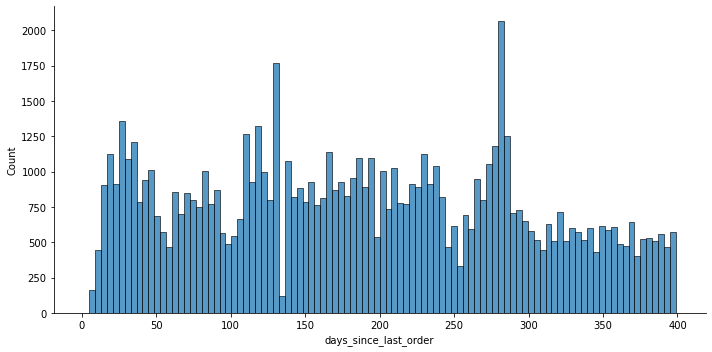

In [55]:
# Рассмотрим распределение recency
sns.displot(data = rfm_value['days_since_last_order'], aspect=2, bins=100)

Распределение не обладает явной ассиметрией на исследуемом промежутке времени. Схоже с равномерным распределением, имеющим редкие выбросы. Явные группы пользователей визуальным анализом выявить трудно, в связи с чем принимаю решение разделить метрику **Recency** на 3 группы по **33 и 66 квантилям распределения**:

- **1** - больше 240 дней - давние клиенты.


- **2** - в промежутке 127 и 240 дней - спящие.


- **3** - меньше 127 дней - недавние.

In [56]:
# Значения метрики recency

quantiles = rfm_value.days_since_last_order.quantile([.33, .66]).to_list()

def recency_score(recency):
    if recency <= quantiles[0]:
        return 3
    elif quantiles[0] <= recency <= quantiles[1]:
        return 2
    else:
        return 1

In [57]:
rfm_value['recency'] = rfm_value['days_since_last_order'].apply(recency_score)

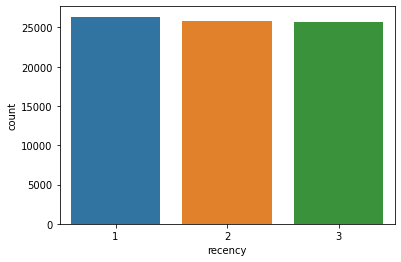

In [58]:
sns.countplot(x='recency', data=rfm_value)

Как и было видно из исходного распределения, значения распределены довольно равномерно. Но набольшее колчиество пользователей находится в первой группе - давние клиенты, чья последняя покупка была более 240 дней назад.

---

## Frequency

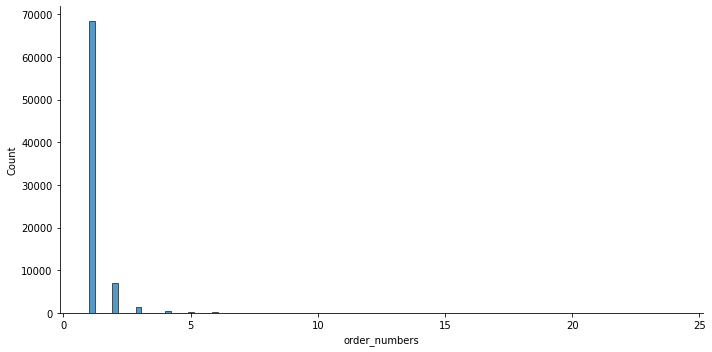

In [59]:
# Рассмотрим распределение frequency
sns.displot(data = rfm_value['order_numbers'], aspect=2, bins=100)

Из распределения видно, что основная часть значений находится в диапазоне от 0 до 5 заказов, а также имеется очень "длинный хвост" из единичных незаметных выбросов. Посмотрим на данные ближе:

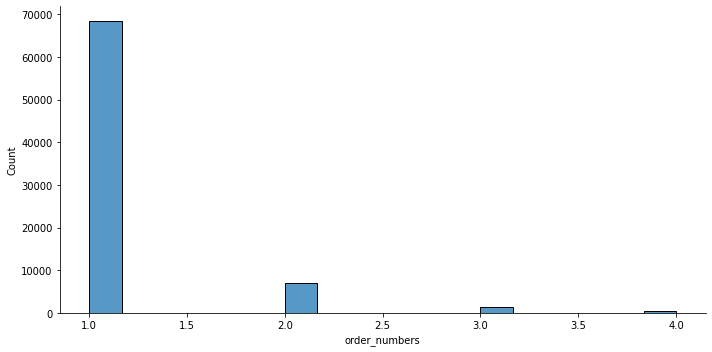

In [60]:
sns.displot(data = rfm_value[rfm_value['order_numbers'] < 5]['order_numbers'], aspect=2)

Из приближенного распределения видно, что основная масса пользователей совершила 1 заказ. Следующая заметная группа совершила 2 заказа, а все значения от 3 заказов и выше похожи друг на друга и одинаково редки. В связи с данным наблюдением, метрика **Frequency** делится на 3 уровня следующим образом:

- **1** - 1 заказ - покупает редко


- **2** - 2 заказа - покупает нечасто


- **3** - 3 и больше заказов - покупает часто

In [61]:
# Значения метрики frequency
def frequency_score(frequency):
    if frequency >= 3:
        return 3
    elif frequency == 2:
        return 2
    else:
        return 1

In [62]:
rfm_value['frequency'] = rfm_value['order_numbers'].apply(frequency_score)

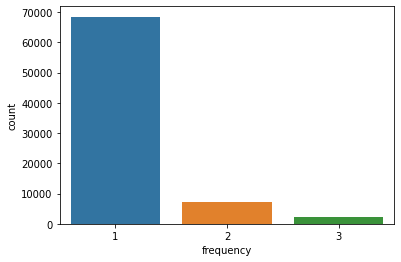

In [63]:
sns.countplot(x='frequency', data=rfm_value)

Преобладающая часть покупателей совершила в нашем магазине 1 заказ.

---

## Monetary

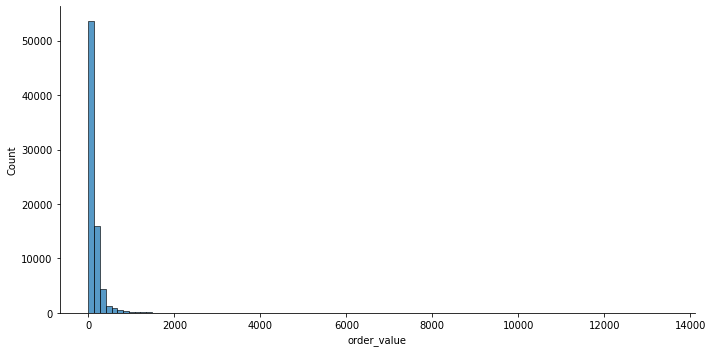

In [64]:
# Рассмотрим распределение общих сумм покупок в подготовленной к анализу таблице
sns.displot(data = rfm_value['order_value'], aspect=2, bins=100)

Видно, что основная часть значений находится в диапазоне от 0 до 1000 долларов, а также имеется очень "длинный хвост" из единичных незаметных выбросов. Посмотрим на данные ближе:

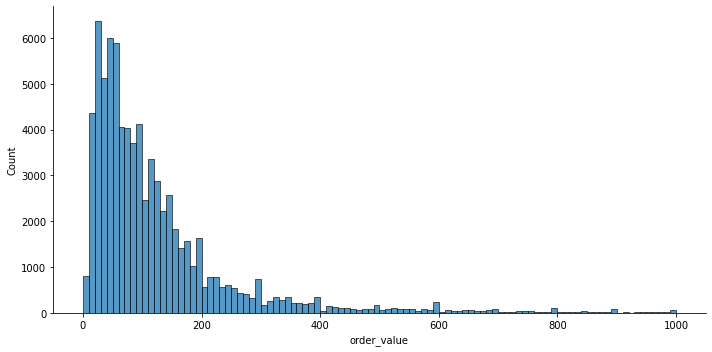

In [65]:
sns.displot(data = rfm_value[rfm_value['order_value'] < 1000]['order_value'], aspect=2, bins=100)

Из приближенного распределения видно, что основная масса пользователей совершили покупки до 200 долларов. Следующая заметная группа находится в диапазоне 200-400 долларов, а все значения выше 400 долларов похожи друг на друга и одинаково редки. В связи с данным наблюдением, метрика **Monetary** делится на 3 уровня следующим образом:

- **1** - 0-200 - маленькая сумма покупок


- **2** - 200-400 - средняя сумма покупок


- **3** - больше 400 - большая сумма покупок

In [66]:
# Значения метрики monetary
def monetary_score(monetary):
    if monetary > 400:
        return 3
    elif 200 < monetary <= 400:
        return 2
    else:
        return 1

In [67]:
rfm_value['monetary'] = rfm_value['order_value'].apply(monetary_score)

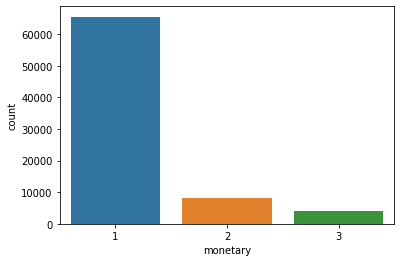

In [68]:
sns.countplot(x='monetary', data=rfm_value)

Преобладающая часть покупателей совершила покупки на сумму до 200 долларов.

---

## Перейдем к формированию сегментов

In [69]:
# Итоговая таблица с метриками у каждого пользователя
rfm_value.head()

,customer_unique_id,order_value,order_numbers,last_order_date,days_since_last_order,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-10 11:11:18,117,3,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-07 18:25:44,119,3,1,1
2,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-10-12 20:49:17,326,1,1,1
3,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-14 20:06:52,293,1,1,1
4,0004bd2a26a76fe21f786e4fbd80607f,154.00,1,2018-04-05 19:48:59,151,2,1,1


Для организации сегментов пользователей, необходимо "склеить" значения метрик **recency, frequency, monetary** в одну строку

In [70]:
# Создаем колонку с сегментами для каждого пользователя
rfm_value['RFM_segment'] = rfm_value.apply(lambda x: str(x['recency'])+str(x['frequency'])+str(x['monetary']), axis=1)

Так как исходное задание требовало вывести среднее значение метрик для каждого сегмента, проведем группировку данных по полученным кластерам и для каждой метрики рассчитаем среднее значение в сегменте.

In [71]:
RFM_segments = rfm_value \
    .groupby('RFM_segment', as_index=False) \
    .agg({'days_since_last_order': 'mean', 
          'order_numbers'        : 'mean', 
          'order_value'          : 'mean'}) \
    .rename(columns={'days_since_last_order': 'R_mean', 
                     'order_numbers'        : 'F_mean', 
                     'order_value'          : 'M_mean'})

In [72]:
# Итоговая таблица со средними значениями метрик
RFM_segments

,RFM_segment,R_mean,F_mean,M_mean
0,111,312.059463,1.000000,78.690199
1,112,311.064015,1.000000,281.703512
2,113,316.464886,1.000000,799.279456
3,121,312.128339,2.000000,103.141156
4,122,307.487059,2.000000,286.319318
5,123,312.701754,2.000000,774.087953
6,131,312.959620,3.453682,120.691781
7,132,309.509615,3.677885,284.790385
8,133,319.302013,4.671141,898.097584
9,211,184.644918,1.000000,79.714927
